# Fig. 5 panel E Sankey plot

In [2]:
import sys
import pandas as pd
import os
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import anndata as ad
from pysankey import sankey

script_path = Path.cwd().parent.parent.parent  / "script"
data_path = Path.cwd().parent.parent.parent  / "data"
sys.path.append(str(script_path))

from utils import *

output_folder = Path.cwd() / "output"
os.makedirs(output_folder, exist_ok=True)

plt.rcParams['pdf.fonttype'] = 42

## Load data

In [3]:
# timestamp = datetime.now().strftime('%Y-%m-%d')
# print(f"Timestamp: {timestamp}")    

Timestamp: 2023-12-04


In [4]:
# manually set the timestamp to use the intermediate results from another date
timestamp = "2023-12-04"

In [5]:
# load adata
csv_path = Path.cwd().parent / "panel_C" / "output" / f"{timestamp}_umap_table.csv"

try:
    # load the file
    umap_table = pd.read_csv(csv_path)
except FileNotFoundError:
    print(f"File {csv_path} not found.\nPlease run leiden analysis first (fig5 panel C) or specify the correct timestamp, current value is {timestamp}")
except pd.errors.ParserError:
    print(f"There was an error parsing the CSV file at {csv_path}.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

### subset data

We remove PGs that are diagnol but not hits, this is because we use Sankey plot to visualize the relocations of hit proteins

In [6]:
u_df = umap_table.copy()
u_df.shape

(8017, 75)

In [7]:
# hits boolean
hit_threshold = 1.6738
hits_bool = (u_df["10d_mean_distance_traveled (200 bootstraps)"] > hit_threshold).to_list()
print(f"number of hits: {sum(hits_bool)}")

# diagonal boolean
diagonal_bool = u_df["cluster_annot_uninf"] != u_df["cluster_annot_inf"]
print(f"number of diagonals: {sum(diagonal_bool)}")

u_df = u_df[(~diagonal_bool) | (hits_bool)] # retain PGs that are either hits or not diagonal

number of hits: 588
number of diagonals: 1494


In [8]:
u_df.shape

(6925, 75)

### Sankey plot

In [9]:
#specify the colors of the clusters
colorDict = {
'nucleus': "#DB5F57",
'cytosol':"#A2CE5A",
'mitochondrion': "#59B6DC",
'ER':"#DB9C58",
'plasma memb. & actin':"#B96EAD",  
'endo-lysosome & trans-Golgi' : "#DBD956",
'ERGIC/Golgi':"#6BC7BB",
'translation/RNA granules':"#414042",
'signaling scaffold':"yellow",
'peroxisome':"#EC008C",
'COPI vesicle':"red",
"centrosome": "#955FA7",
"unlabelled": "grey",
}


In [10]:
umap_table.columns

Index(['Unnamed: 0', 'Protein IDs', 'Majority protein IDs', 'Gene names',
       '14-RAB1A', '17-CAPRIN1', '17-RPL36', '12-LAMP1', '17-MAP1LC3B',
       '14-RAB11A', '17-G3BP1', '17-ATP1B3', '14-GOLGA2', '14-RAB14',
       '14-RAB7A', '14-COPE', '12-YWHAQ', '17-SLC30A2', '11-EEA1', '11-GPR107',
       '10-RTN4', '10-VPS35', '09-PEX3', '09-TOMM20', '11-SEC31A', '09-EDC4',
       '09-ATG101', '11-CEP350', '10-TOMM20', 'NOC_cytosol', 'NOC_organelle',
       'NOC_nuclear', '14-RAB14_Infected', '17-SLC30A2_Infected',
       '17-G3BP1_Infected', '14-GOLGA2_Infected', '14-COPE_Infected',
       '17-CAPRIN1_Infected', '17-RPL36_Infected', '14-RAB7A_Infected',
       '12-YWHAQ_Infected', '14-RAB11A_Infected', '14-RAB1A_Infected',
       '17-MAP1LC3B_Infected', '12-LAMP1_Infected', '17-ATP1B3_Infected',
       '10-VPS35_Infected', '09-ATG101_Infected', '09-PEX3_Infected',
       '10-TOMM20_Infected', '11-EEA1_Infected', '09-TOMM20_Infected',
       '11-GPR107_Infected', '11-CEP350_Infected', '09

In [11]:
u_df["cluster_annot_uninf"].unique()

array(['nucleus', 'cytosol', 'endo-lysosome & trans-Golgi',
       'translation/RNA granules', 'plasma memb. & actin', 'ER',
       'mitochondrion', 'peroxisome', 'ERGIC/Golgi'], dtype=object)

In [12]:
# remove unlabeled

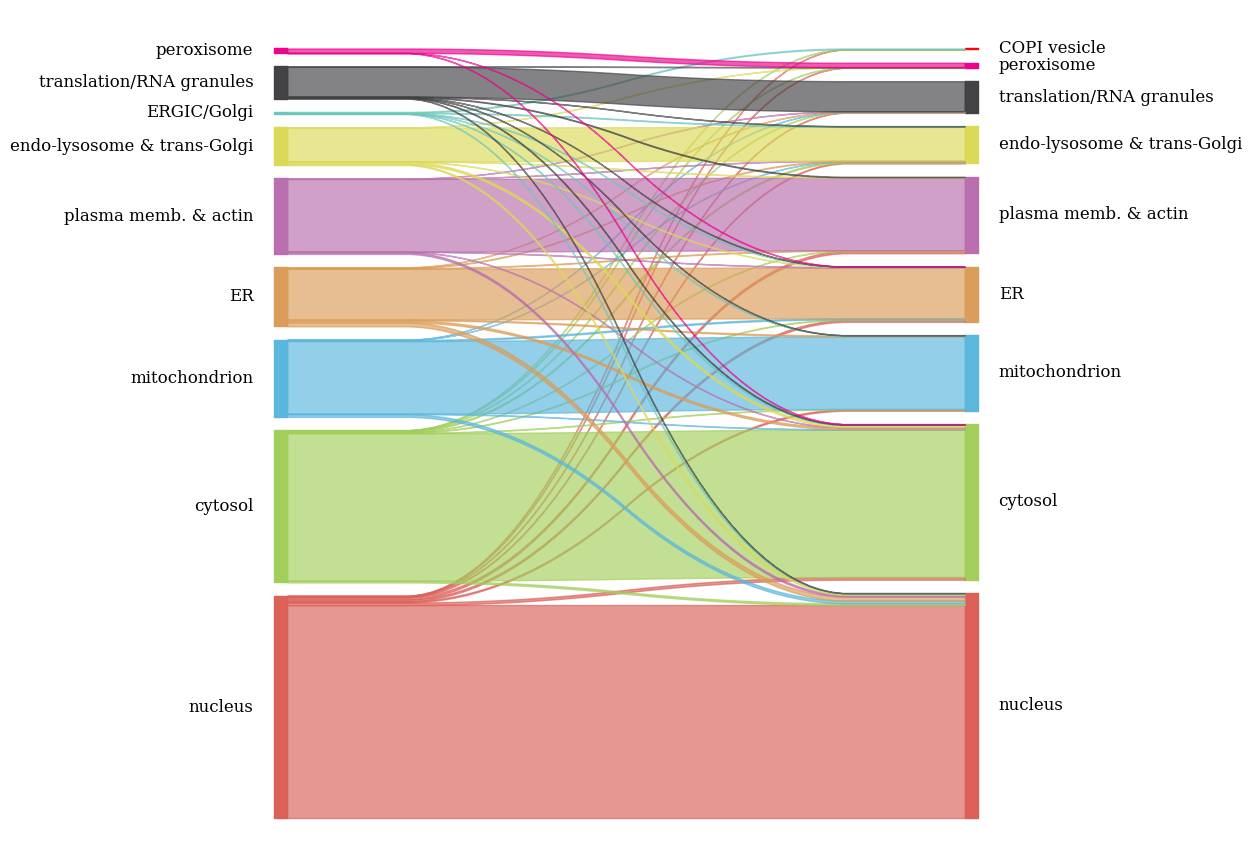

In [13]:
plt.figure(figsize=(10, 11))
ax = sankey(
    u_df["cluster_annot_uninf"], u_df["cluster_annot_inf"], aspect=20,
    colorDict=colorDict,
    fontsize=12, color_gradient = False,
    leftLabels= ['nucleus', 'cytosol', 'mitochondrion','ER','plasma memb. & actin',  'endo-lysosome & trans-Golgi', 'ERGIC/Golgi','translation/RNA granules',
                   'peroxisome'],
    rightLabels = ['nucleus', 'cytosol','mitochondrion','ER','plasma memb. & actin', 'endo-lysosome & trans-Golgi', 'translation/RNA granules',  
        'peroxisome', 'COPI vesicle',
       ]
)

# save figure
plt.savefig(output_folder / "sankey_plot.pdf",format = "pdf", dpi = 300)